<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230319.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta
import os
import re
from functools import reduce
from collections import defaultdict
from scipy import stats
from scipy.stats import norm

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'app_wau.csv',
 'mall_customers.csv',
 'match_result_test.csv',
 'scanner_data.csv',
 'ecommerce-data.csv',
 'sample-sales-data.csv',
 '1_order_payments_dataset.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'online_retail.xlsx',
 'ab_experiment.csv',
 'bz_data_analyis.csv',
 'cookie_cats.csv',
 'test.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sales.csv',
 'lead_conversion.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'groceries.csv',
 '1_orders_dataset.csv',
 'online_retail_II.xlsx',
 'mock_sales_data.csv',
 'sales_data_with_stores.csv',
 'sales_vs_discount.csv',
 '1_customers_dataset.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'sample_data']

In [9]:
df = pd.read_csv('lead_conversion.csv')
df.columns = ['_'.join(re.split('(?=[A-Z][a-z])', re.sub(' ', '', a))).lower().lstrip('_') for a in df.columns]
df.head()

,prospectid,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,total_time_spenton_website,page_views_per_visit,last_activity,country,specialization,howdidyouhearaboutx_education,whatisyourcurrentoccupation,whatmattersmosttoyouinchoosingacourse,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,receive_more_updates_about_our_courses,tags,lead_quality,updatemeon_supply_chain_content,getupdatesondm_content,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,iagreetopaytheamountthroughcheque,afreecopyof_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [27]:
cnt = df[['lead_origin', 'converted']].value_counts().reset_index(name = 'cnt').sort_values(['lead_origin','converted'])
cnt['ratio'] = cnt.groupby('lead_origin')['cnt'].apply(lambda x : round(x/sum(x)*100,2))
cnt

,lead_origin,converted,cnt,ratio
1,API,0,2465,68.85
3,API,1,1115,31.15
0,Landing Page Submission,0,3118,63.81
2,Landing Page Submission,1,1768,36.19
5,Lead Add Form,0,54,7.52
4,Lead Add Form,1,664,92.48
6,Lead Import,0,42,76.36
7,Lead Import,1,13,23.64
8,Quick Add Form,1,1,100.00


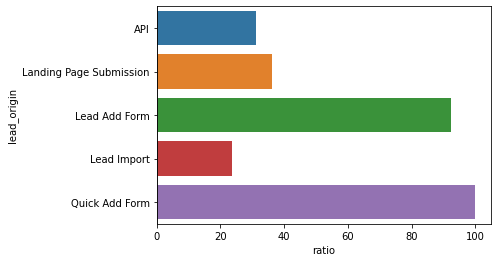

In [33]:
sns.barplot(data = cnt[cnt['converted'] == 1], x = 'ratio', y = 'lead_origin')
plt.axvline(x = 0, color = '#333333')
plt.show()

In [34]:
df.head()

,prospectid,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,total_time_spenton_website,page_views_per_visit,last_activity,country,specialization,howdidyouhearaboutx_education,whatisyourcurrentoccupation,whatmattersmosttoyouinchoosingacourse,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,receive_more_updates_about_our_courses,tags,lead_quality,updatemeon_supply_chain_content,getupdatesondm_content,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,iagreetopaytheamountthroughcheque,afreecopyof_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [38]:
df['tags'].value_counts().reset_index(name = 'cnt')

,index,cnt
0,Will revert after reading the email,2072
1,Ringing,1203
2,Interested in other courses,513
3,Already a student,465
4,Closed by Horizzon,358
5,switched off,240
6,Busy,186
7,Lost to EINS,175
8,Not doing further education,145
9,Interested in full time MBA,117


In [50]:
df2 = df[['lead_number','converted', 'search','magazine','newspaper_article','x_education_forums','newspaper','digital_advertisement','through_recommendations','receive_more_updates_about_our_courses']]
df2.head()

,lead_number,converted,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,receive_more_updates_about_our_courses
0,660737,0,No,No,No,No,No,No,No,No
1,660728,0,No,No,No,No,No,No,No,No
2,660727,1,No,No,No,No,No,No,No,No
3,660719,0,No,No,No,No,No,No,No,No
4,660681,1,No,No,No,No,No,No,No,No


In [51]:
df2 = pd.melt(df2, id_vars = ['lead_number','converted'], var_name = 'type', value_name = 'result')
df2.head()

,lead_number,converted,type,result
0,660737,0,search,No
1,660728,0,search,No
2,660727,1,search,No
3,660719,0,search,No
4,660681,1,search,No


In [52]:
cnt = df2.groupby(['converted', 'type', 'result'])['lead_number'].count().reset_index(name = 'cnt')
cnt['ratio'] = cnt.groupby(['converted','type'])['cnt'].apply(lambda x : round(x/sum(x)*100,2))
cnt.head()

,converted,type,result,cnt,ratio
0,0,digital_advertisement,No,5676,99.95
1,0,digital_advertisement,Yes,3,0.05
2,0,magazine,No,5679,100.00
3,0,newspaper,No,5678,99.98
4,0,newspaper,Yes,1,0.02


<Axes: xlabel='type', ylabel='ratio'>

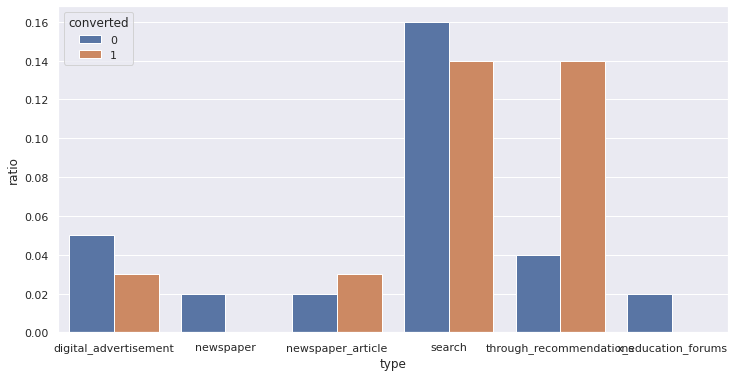

In [53]:
sns.set(rc = {'figure.figsize':[12,6]})
sns.barplot(data = cnt[cnt['result'] == 'Yes'], x = 'type', y = 'ratio', hue = 'converted')

<Axes: >

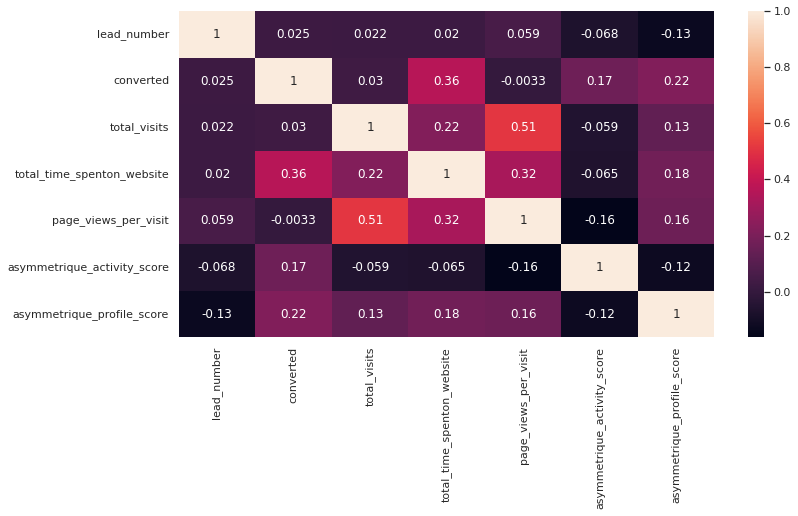

In [54]:
sns.heatmap(df.corr(), annot = True)

# Iterators

In [55]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [57]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [59]:
{k : [user[k] for user in users] for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}